In [13]:
import os
import datetime
import numpy as np
import scipy.signal
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.dates as md
%matplotlib inline  

In [44]:
path = []
path.append('/home/roman/mnt/meteor1/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/05/20/20170905203231248_SVAKOV-R12_raws.fits')
path.append('/home/roman/mnt/meteor1/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/05/19/20170905191652368_SVAKOV-R12_raws.fits')
path.append('/home/roman/mnt/meteor1/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/02/06/20170902062919368_SVAKOV-R12_raws.fits')

Zpracovavam soubor: /home/roman/mnt/meteor1/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/05/20/20170905203231248_SVAKOV-R12_raws.fits
delka zaznamu: 6600.002111999999
cas prvni vzorku s GPS: 3833.05330991


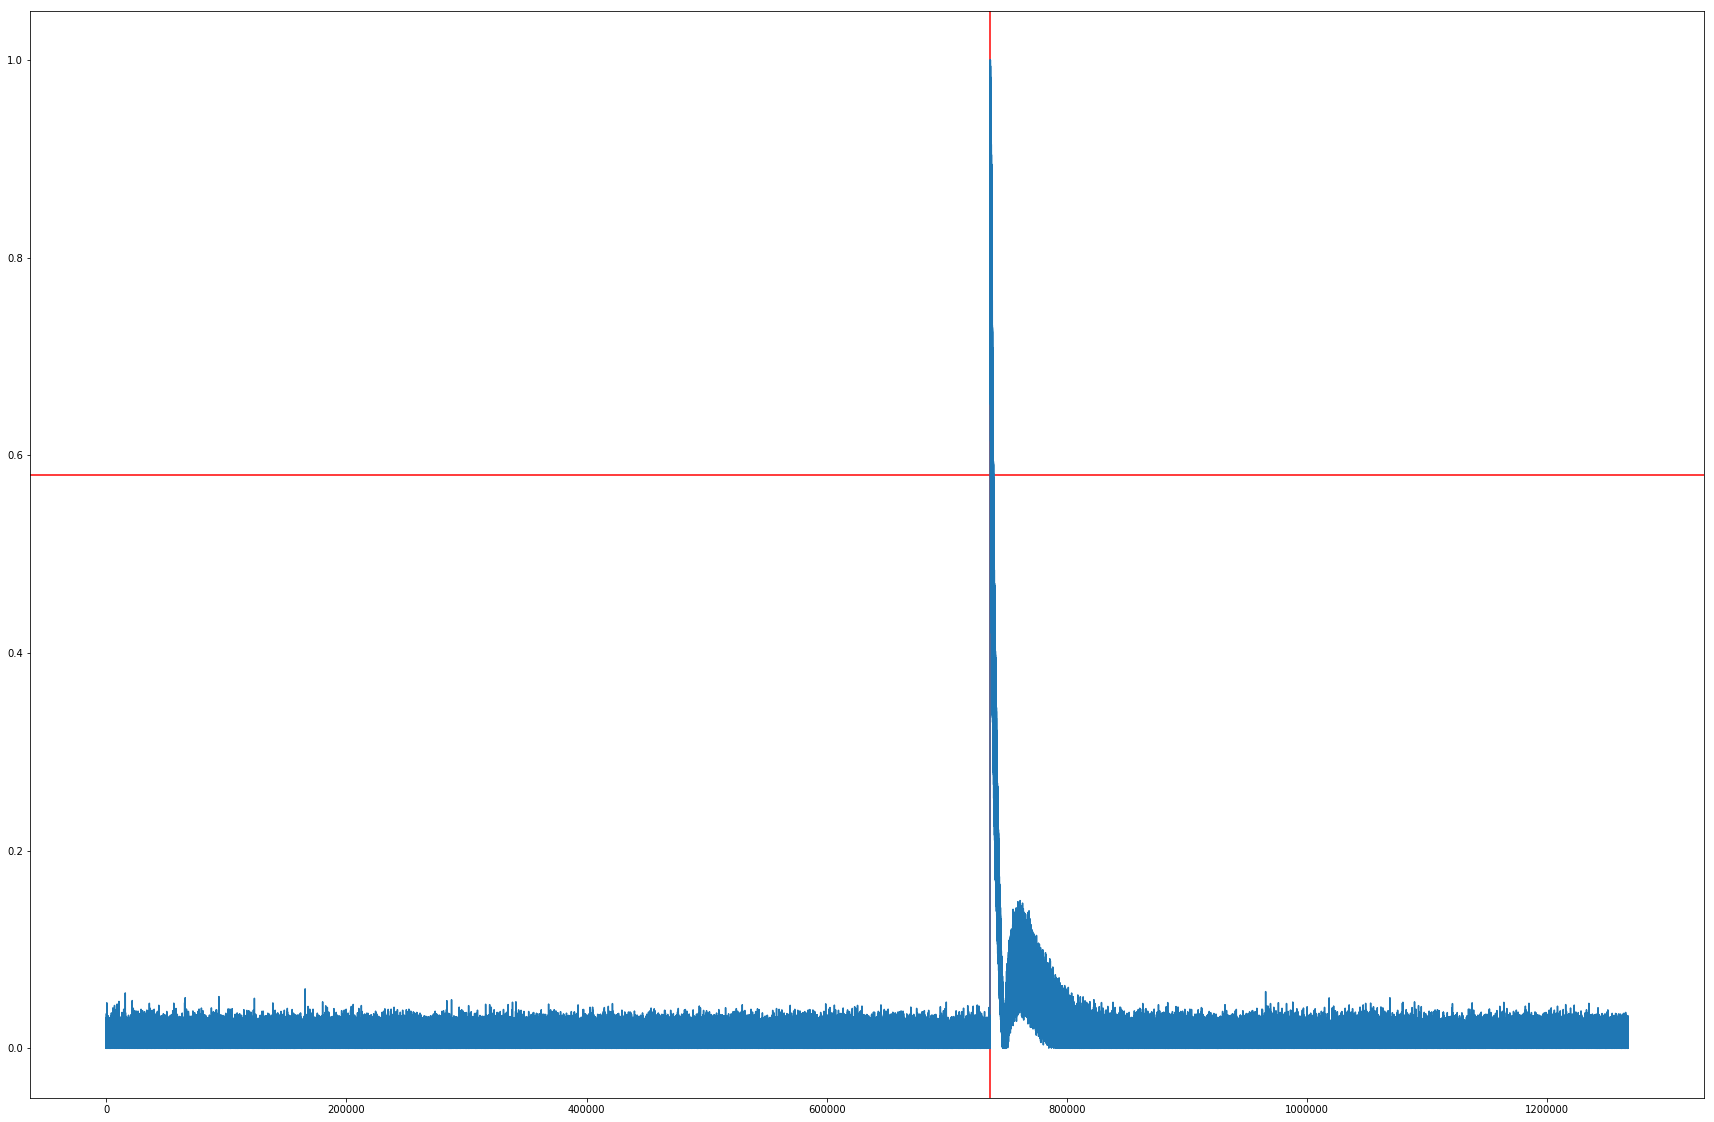

Zpracovavam soubor: /home/roman/mnt/meteor1/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/05/19/20170905191652368_SVAKOV-R12_raws.fits
delka zaznamu: 7000.00224
cas prvni vzorku s GPS: 5321.782952969999


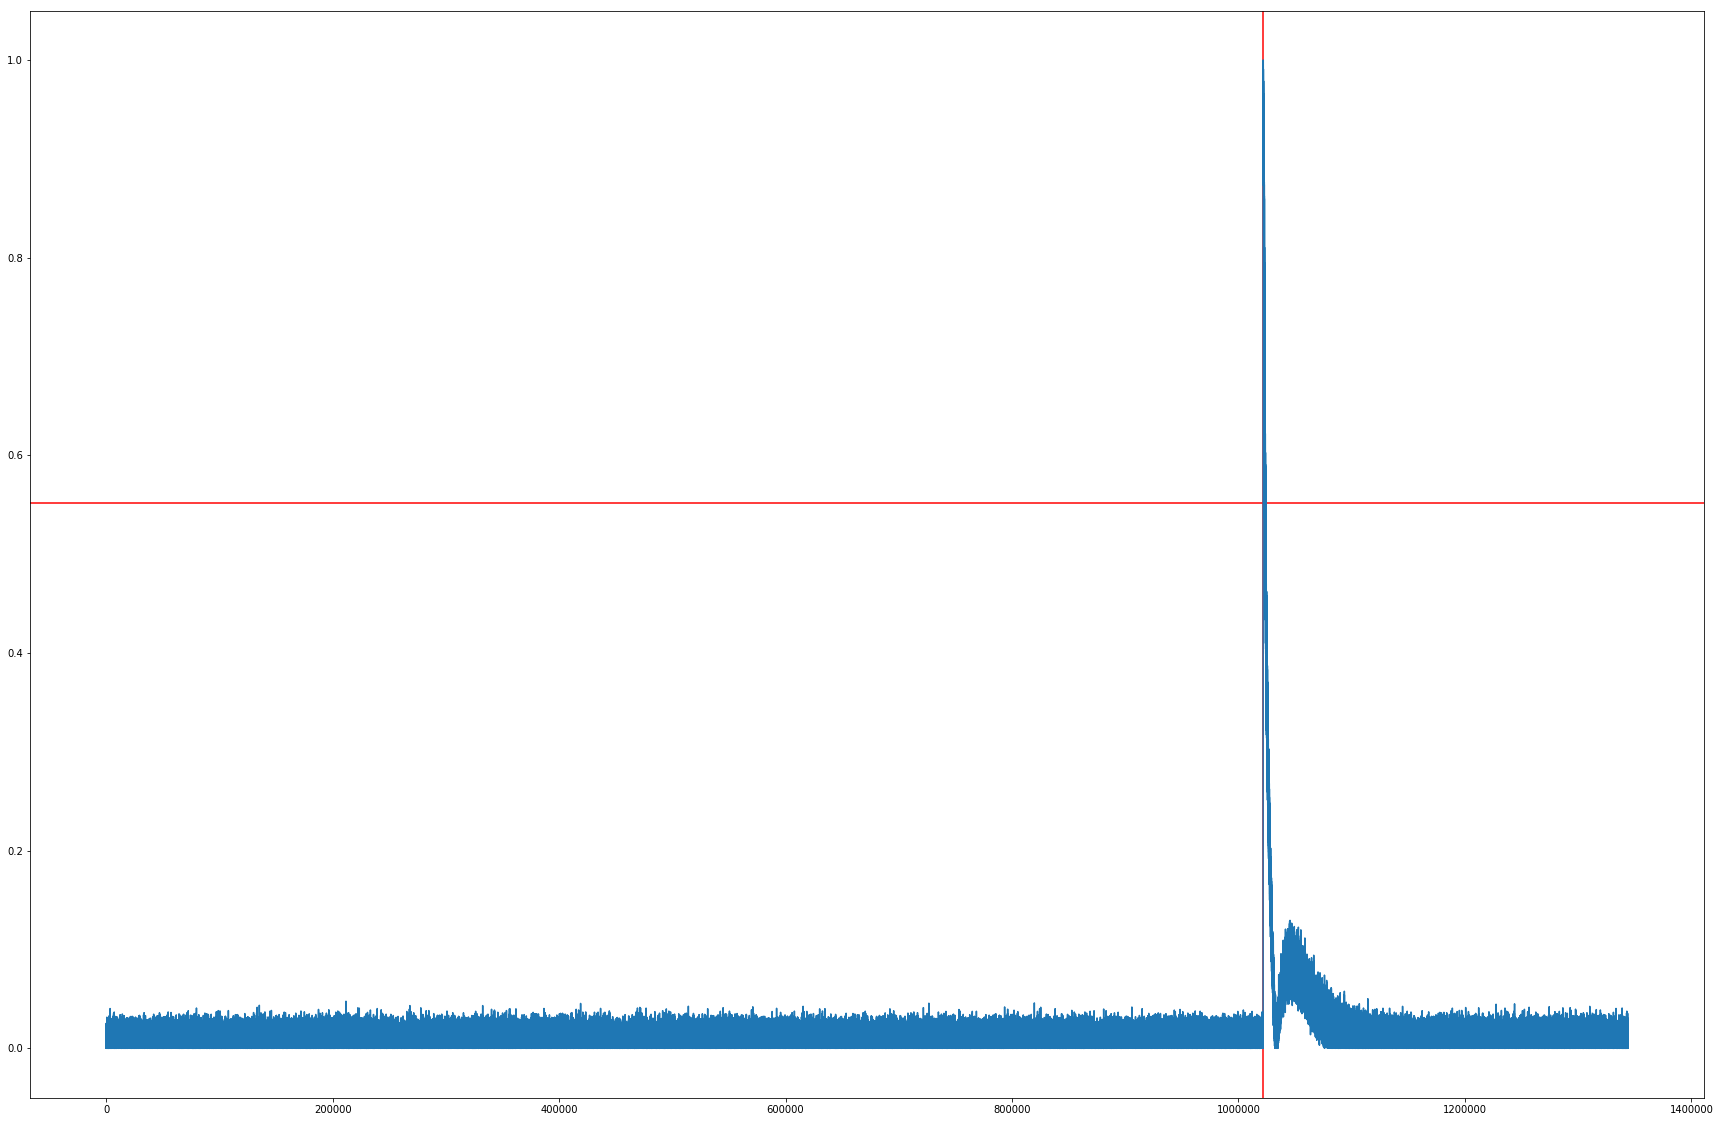

Zpracovavam soubor: /home/roman/mnt/meteor1/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/02/06/20170902062919368_SVAKOV-R12_raws.fits
delka zaznamu: 24800.007935999998
cas prvni vzorku s GPS: 2270.6257266


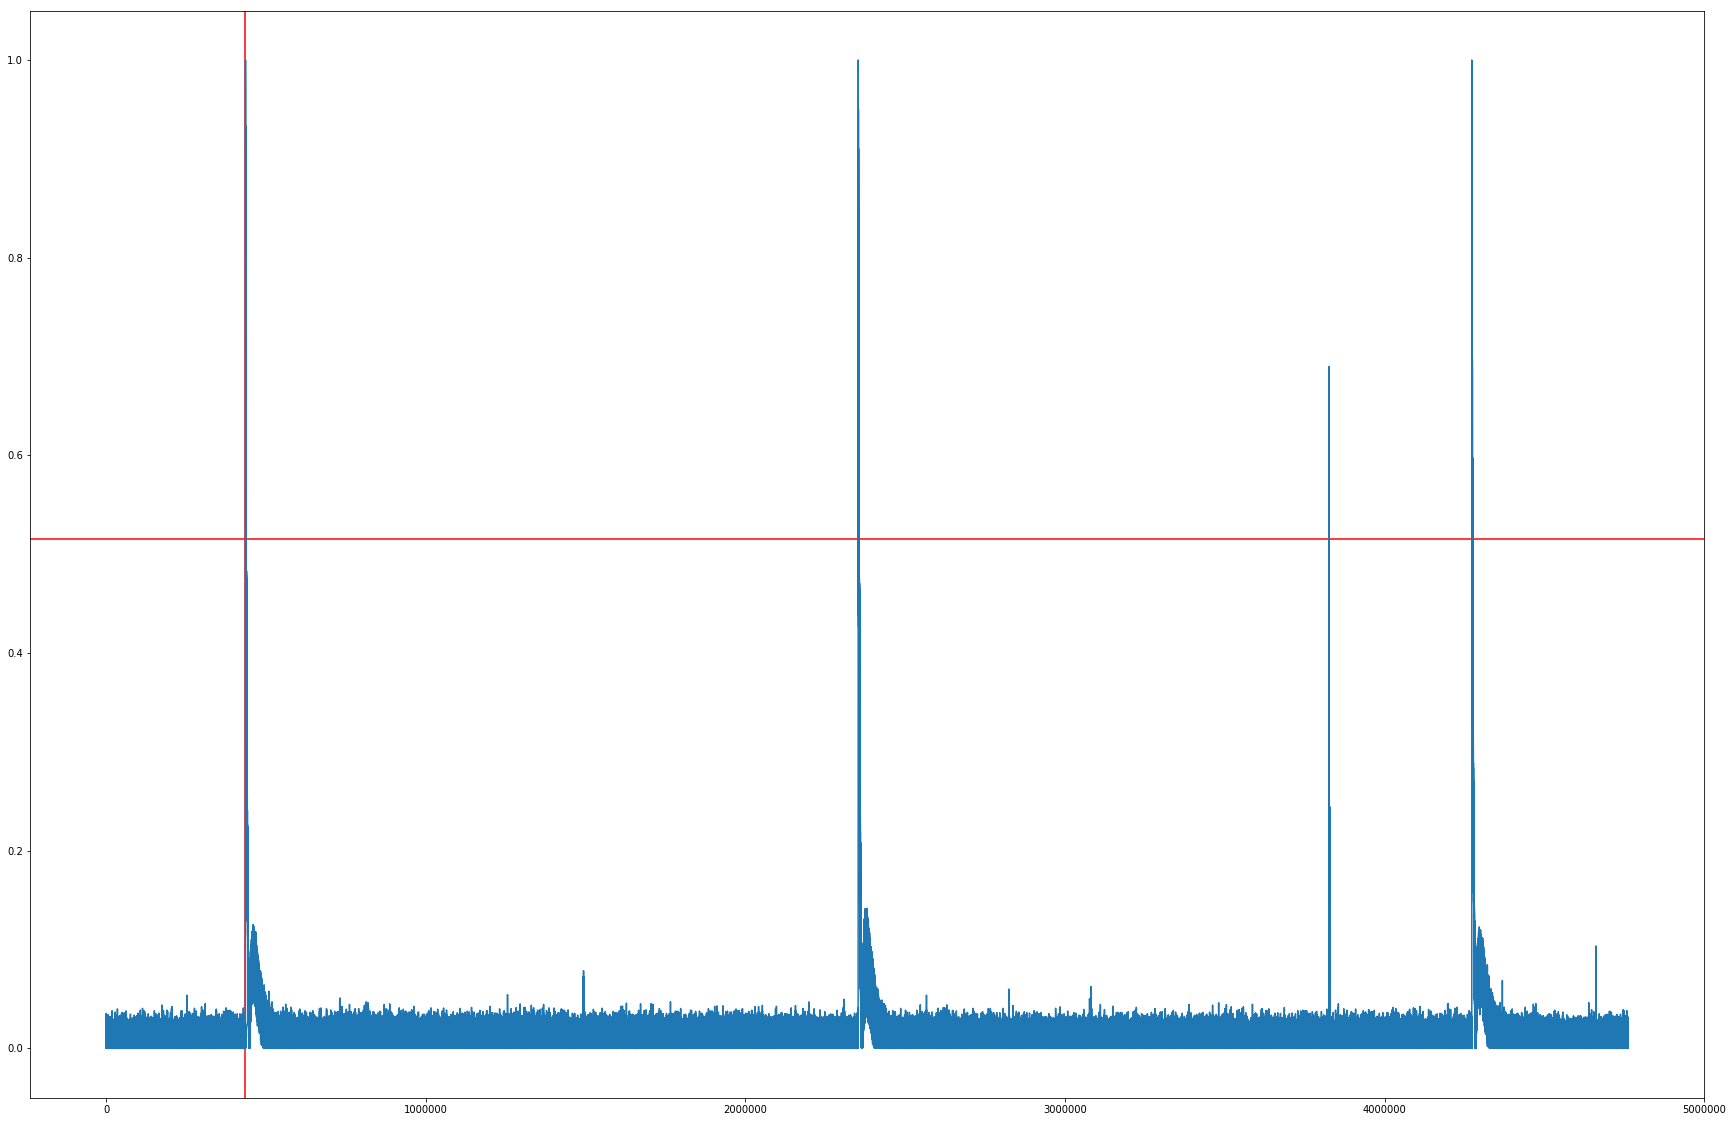

In [45]:
sigma = 15 # pri kolika sigma se provadi detekce casove znacky

for file in path:
    plt.figure(figsize=(30, 20))
    hdulist = fits.open(file)
    met_data = np.abs(np.ravel(hdulist[0].data))
    clip_val = np.std(met_data)*sigma
    plt.axhline(y=clip_val, color='red')
    max_val = np.max(met_data)
    for i, point in enumerate(met_data):
        if point > clip_val:
            plt.axvline(x=i, color='red')
            break
            
    print("Zpracovavam soubor:", file)
    print('delka zaznamu:', hdulist[0].header['NAXIS2']*hdulist[0].header['CDELT2'])
    print('cas prvni vzorku s GPS:',i/2*hdulist[0].header['CDELT2'])
    plt.plot(met_data)
    plt.show()
    print("==================================")
    